Sjoberg vision, daraus fragen, mit aktuellen struktur und den damit gesammelten Daten beantworten lassen

In [115]:
import sparql_dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

endpoint_url = "https://orkg.org/triplestore"

PREFIX = """
        PREFIX orkgr: <http://orkg.org/orkg/resource/>
        PREFIX orkgc: <http://orkg.org/orkg/class/>
        PREFIX orkgp: <http://orkg.org/orkg/predicate/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        """

Table 2 Extent of empirical studies

**Welche emprischen Forschungsmethoden verwenden Forscher im Bereich des RE?**

<AxesSubplot:ylabel='collection method'>

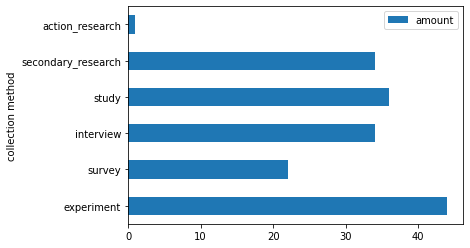

In [116]:
query = """
        SELECT ?year, ?experiment, ?survey, ?interview, ?study, ?secondary_research, ?action_research
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?paper orkgp:P29 ?year.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007/rdfs:label ?experiment}
              OPTIONAL{?data_collection_method orkgp:P57036/rdfs:label ?survey}
              OPTIONAL{?data_collection_method orkgp:P57034/rdfs:label ?interview.}
              OPTIONAL{?data_collection_method orkgp:P57040/rdfs:label ?study.}
              OPTIONAL{?data_collection_method orkgp:P57021/rdfs:label ?secondary_research.}
              OPTIONAL{?data_collection_method orkgp:P57020/rdfs:label ?action_research.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
#get oldest year
start_year = data.sort_values(by=['year'])['year'].iloc[0]
cm = []
values = []
for col in range(1, len(data.columns)):
        cm.append(data.columns[col])
        values.append(data[data.columns[col]].value_counts().sum())
pd.DataFrame(data={'collection method': cm, 'amount':values}).plot(kind='barh', x='collection method', y='amount')

Beschreibung

Wie hat sich die Verwendung der Methoden in den letzten Jahren geändert?

<AxesSubplot:title={'center':'Change of method usage since 2015'}, xlabel='year'>

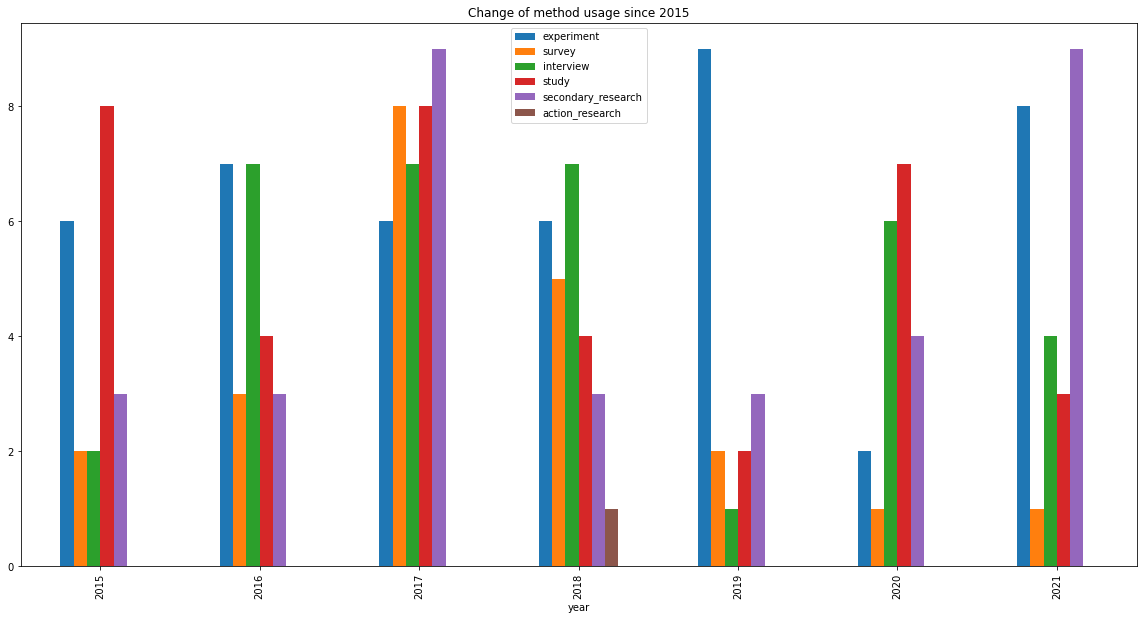

In [117]:
data.groupby(['year']).count().plot(kind='bar', figsize=(20,10), title='Change of method usage since {year}'.format(year=start_year))

Beschreibung

Table 3 Quality of empirical studies

Wie hoch ist der Anteil bei der Verwendung von surveys, case studies und action research im RE?

<AxesSubplot:ylabel='research methods'>

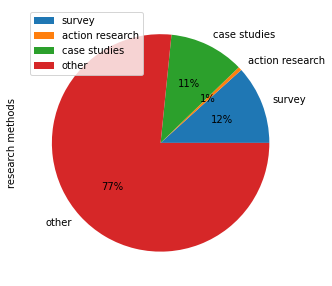

In [118]:
query = """
        SELECT ?year, ?surveys, ?action_research, ?case_studies
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?contribution orkgp:P56008 ?collection.
              ?paper orkgp:P29 ?year.
              OPTIONAL{?collection orkgp:P57036 ?surveys.}
              OPTIONAL{?collection orkgp:P57020 ?action_research.}
              OPTIONAL{?collection orkgp:P57040/rdfs:label ?case_studies.
                FILTER regex(?case_studies, "case study", "i")}
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_of_survey = data['surveys'].value_counts().sum()
number_of_action_research = data['action_research'].value_counts().sum()
number_of_case_studies = data['case_studies'].value_counts().sum()
all = number_of_action_research + number_of_case_studies + number_of_survey
method_data = pd.DataFrame({'research methods':[number_of_survey, number_of_action_research, number_of_case_studies, len(data) - all]}, index=['survey', 'action research', 'case studies', 'other'])
method_data.plot(kind='pie',  y='research methods', autopct='%1.0f%%', figsize=(5,5))

Beschreibung

**Wie hat sich die Nutzung dieser drei Methoden (survey, case studies und action research) in den vergangenen Jahren entwickelt?**

<AxesSubplot:xlabel='year'>

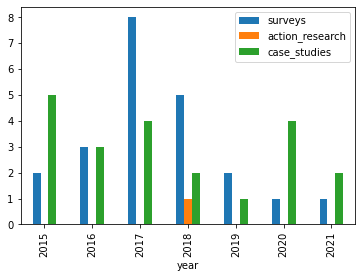

In [119]:
data.groupby('year').count().plot(kind='bar')

Beschreibung

Welche statistischen Methoden werden in der Forschung im RE verwendet?

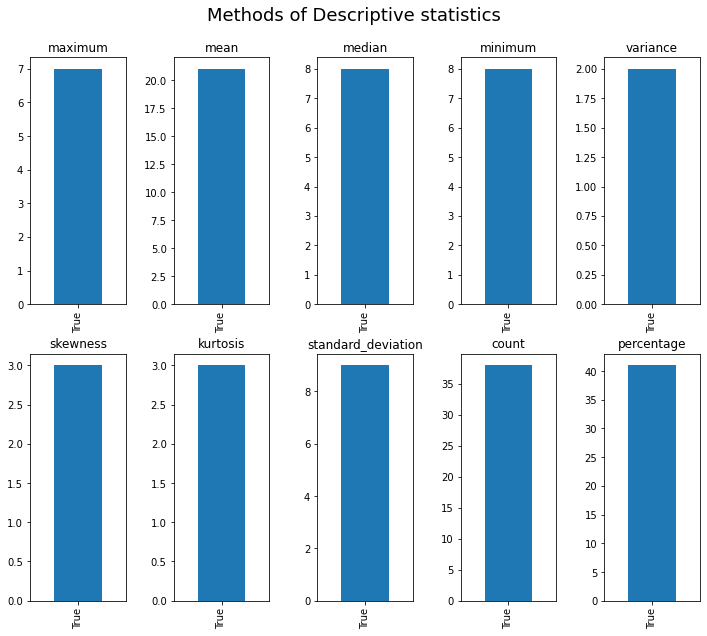

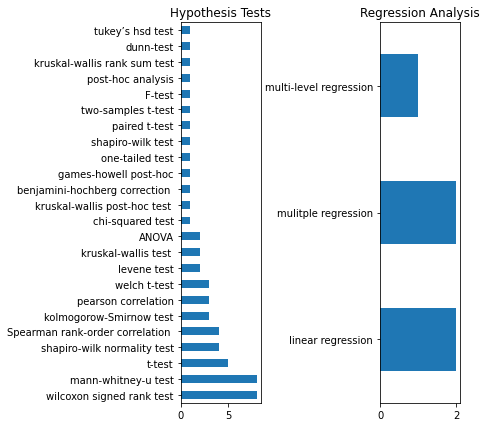

2015

In [136]:
from matplotlib.pyplot import title
from numpy import maximum, minimum


query = """
        SELECT ?year, ?maximum, ?mean, ?median, ?minimum, ?variance, ?skewness, ?kurtosis, ?standard_deviation, ?count, ?percentage, ?hypothesis_tests, ?regression
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper orkgp:P29 ?year.
              ?contribution orkgp:P15124 ?analysis.
              OPTIONAL{?analysis orkgp:P56048 ?descriptive.
                OPTIONAL{?descriptive orkgp:P57005 ?tendency.
                    ?tendency orkgp:P44108 ?maximum.
                    ?tendency orkgp:P47000 ?mean.
                    ?tendency orkgp:P57006 ?median.
                    ?tendency orkgp:P44107 ?minimum.
                    ?tendency orkgp:P57007 ?mode.}
                OPTIONAL{?descriptive orkgp:P57008 ?dispersion.
                    ?dispersion orkgp:P4013  ?range.
                    ?dispersion orkgp:P44087 ?standard_deviation.
                    ?dispersion orkgp:P57009 ?variance.
                    ?dispersion orkgp:P59063 ?skewness.
                    ?dispersion orkgp:P59064 ?kurtosis.}
                OPTIONAL{?descriptive orkgp:P56049 ?frequency.
                    ?frequency orkgp:P55023 ?count.
                    ?frequency orkgp:P56050 ?percentage.}
                }
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56044/rdfs:label ?hypothesis_tests.}
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56045/rdfs:label ?regression.}    
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
start_year = data.sort_values('year')['year'].iloc[0]
descriptive = data.iloc[:, 1:11]
#plot descriptive methods
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Methods of Descriptive statistics", fontsize=18, y=0.95)
for n, col in enumerate(descriptive.columns):
    ax = plt.subplot(2, 5, n + 1)
    if descriptive[descriptive[col] == True][col].sum() > 0:
        descriptive[descriptive[col] == True][col].value_counts().plot(kind='bar', ax=ax)
        #descriptive[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

#plot inferential methods
fig, (ax, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=1.5)
data['hypothesis_tests'].value_counts().plot(kind='barh', figsize=(5,7), title='Hypothesis Tests', ax=ax)
data['regression'].value_counts().plot(kind='barh', title='Regression Analysis', ax=ax2)
plt.show()


Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?

C:\Users\Felix\AppData\Local\Temp\ipykernel_13632\2726673099.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('year')['hypothesis_tests', 'regression'].count().plot(kind='bar', title='Usage of Inferential Statistic Methods since {year}'.format(year=start_year))


<AxesSubplot:title={'center':'Usage of Inferential Statistic Methods since 2015'}, xlabel='year'>

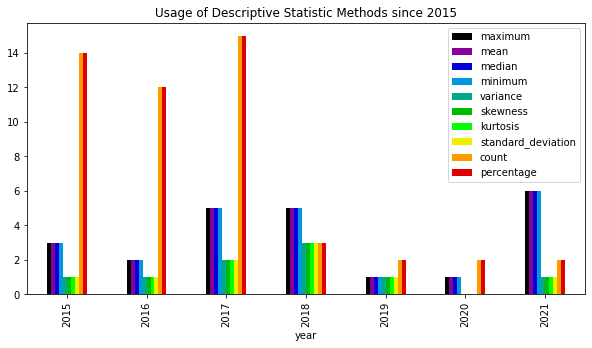

<Figure size 432x288 with 0 Axes>

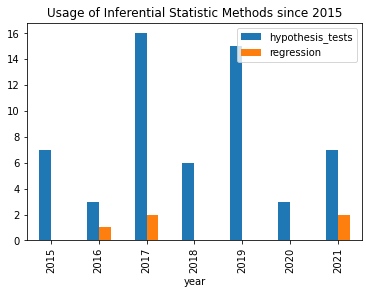

In [140]:
#descriptive methods over years
descriptive = data.iloc[:, :11]
colormap = plt.cm.nipy_spectral 
colors = [colormap(i) for i in np.linspace(0, 0.9, 10)]
descriptive.groupby('year').count().plot(kind='bar', figsize=(10,5), color=colors, title='Usage of Descriptive Statistic Methods since {year}'.format(year=start_year))

#inferential methods over years
plt.figure()
data.groupby('year')['hypothesis_tests', 'regression'].count().plot(kind='bar', title='Usage of Inferential Statistic Methods since {year}'.format(year=start_year))

Beschreibung

Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht?

<Figure size 432x288 with 0 Axes>

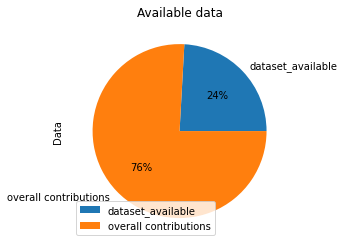

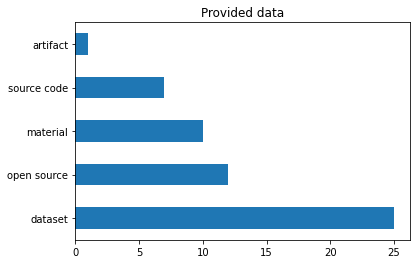

In [122]:
query = """
        SELECT ?contribution, ?data
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P56008/orkgp:DATA/orkgp:P17001/rdfs:label ?data.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
available_data = data['data'].value_counts().sum()
test = pd.DataFrame({'Data':[available_data, len(data)]}, index=['dataset_available', 'overall contributions'])
plt.figure()
test.plot(kind='pie', y='Data', autopct='%1.0f%%', title="Available data") 
plt.figure()               
data['data'].value_counts().plot(kind='barh', title="Provided data")
plt.show()

Beschreibung

Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?

<AxesSubplot:ylabel='highlighted'>

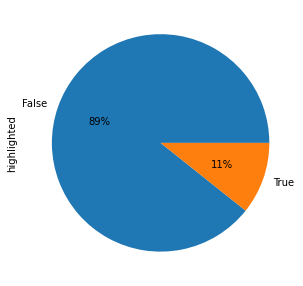

In [123]:
query = """
        SELECT ?contribution, ?highlighted, ?hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P57004 ?research_question_answer.
                OPTIONAL{?research_question_answer orkgp:P55039 ?highlighted.
                         ?research_question_answer orkgp:P55038 ?hidden.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['highlighted'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))

Anhand dieses Diagramms ist erkennbar, dass nur 11% der aktuell im ORKG beschriebenen Contributions im Bereich des RE eine Antwort auf eine Forschungsfrage explizit im Text geben.

**Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?**

<AxesSubplot:ylabel='methods'>

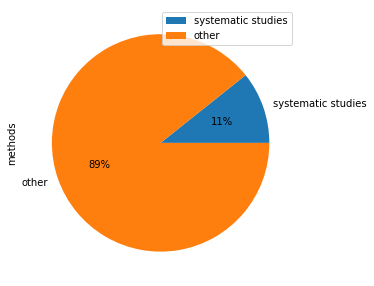

In [124]:
query = """
        SELECT ?contribution, ?secondary
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              OPTIONAL{?contribution orkgp:P56008/orkgp:P57021/rdfs:label ?secondary.
              FILTER regex(?secondary, "(literature|systematic)", "i")}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_systematic_studies = data['secondary'].value_counts().sum()
systematic_studies = pd.DataFrame({'methods':[number_systematic_studies, len(data) - number_systematic_studies]}, index=['systematic studies', 'other'])
systematic_studies.plot(kind='pie', y='methods', autopct='%1.0f%%', figsize=(5,5))

Beschreibung

Verwenden Forschungen mehr als eine Forschungsmethode?

,contribution,collection
2,http://orkg.org/orkg/resource/R194140,case study
41,http://orkg.org/orkg/resource/R194956,interview
42,http://orkg.org/orkg/resource/R194956,questionnaire
48,http://orkg.org/orkg/resource/R195154,questionnaire
49,http://orkg.org/orkg/resource/R195154,interview
50,http://orkg.org/orkg/resource/R195154,observation
51,http://orkg.org/orkg/resource/R195154,storyboarding
60,http://orkg.org/orkg/resource/R195553,interview
61,http://orkg.org/orkg/resource/R195553,online survey
69,http://orkg.org/orkg/resource/R195729,systematic literature review


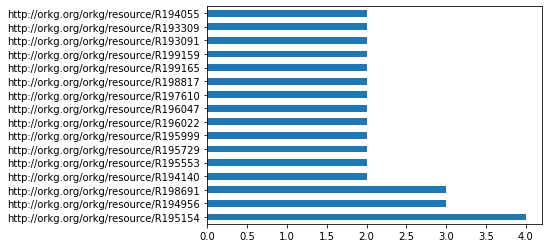

In [125]:
query = """
        SELECT ?contribution, ?collection
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/rdfs:label ?collection.
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data = data[data['collection'] != 'collection']
combined = data[data.duplicated(['contribution'], keep=False)]
combined['contribution'].value_counts().plot(kind='barh')
combined

Dieses Diagramm stellt 15 Paper dar, die mehr als eine Methode für die Sammlung von Daten verwendet haben.

Welche Methoden werden Kombiniert?

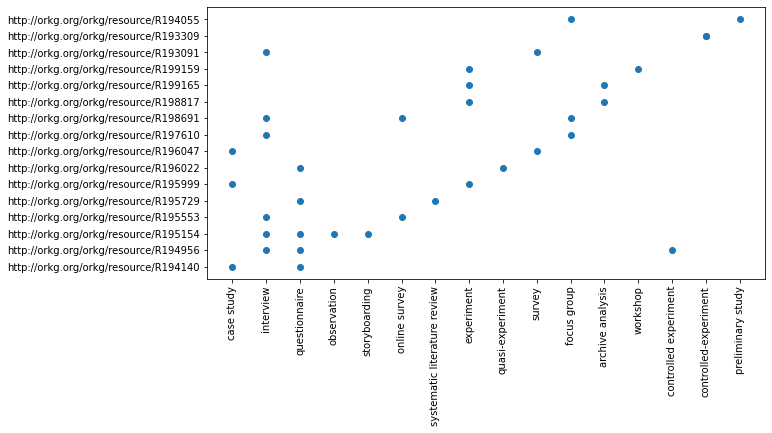

In [126]:
plt.figure(figsize=(10, 5))
plt.scatter(x=combined['collection'], y=combined['contribution'])
plt.xticks(rotation=90)
plt.show()

Beschreibung

**Welche Kombinationen aus data collection methods und analysis methods werden verwendet?**

<AxesSubplot:title={'center':'Analysis method in combination with experiment'}, ylabel='usage'>

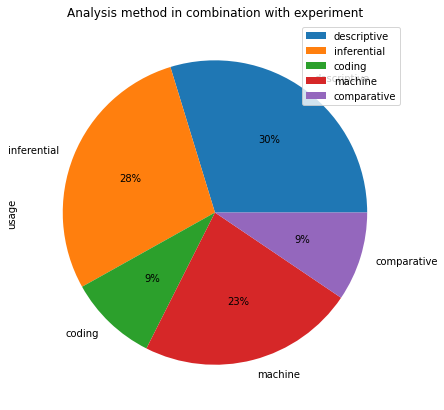

In [167]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P1007 ?experiment.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with experiment")

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

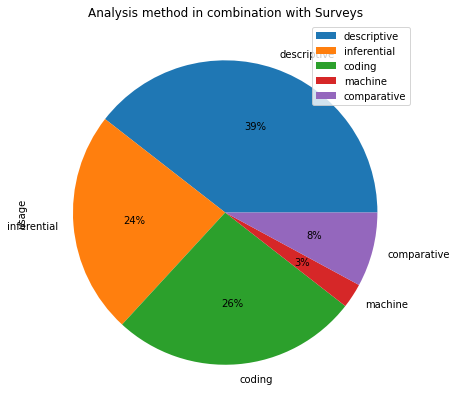

In [169]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57036 ?experiment.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Surveys")

<AxesSubplot:title={'center':'Analysis method in combination with Studies'}, ylabel='usage'>

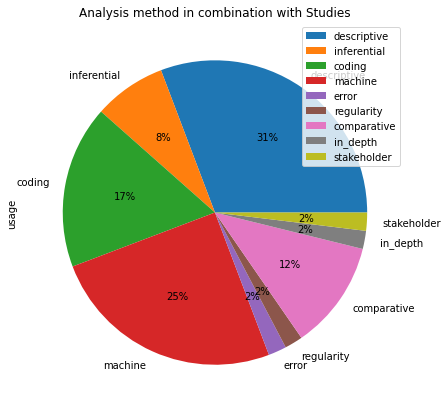

In [129]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57040 ?studies.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Studies")

<AxesSubplot:title={'center':'Analysis method in combination with Secondary Research'}, ylabel='usage'>

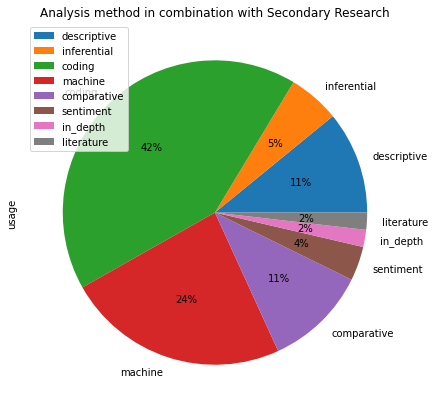

In [130]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57021 ?secondary_research.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Secondary Research")

Beschreibung

<AxesSubplot:title={'center':'Analysis method in combination with Interviews'}, ylabel='usage'>

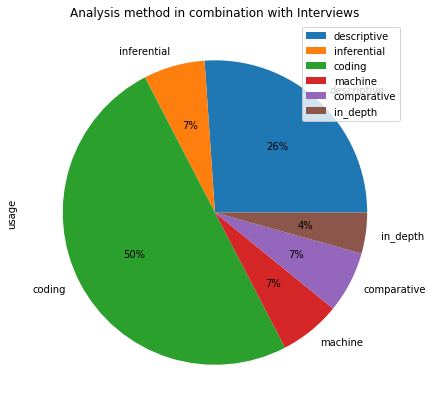

In [131]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57034 ?interview.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with Interviews") 

In [181]:
query = """
        SELECT ?experiment,  ?study, ?survey, ?secondary_research, ?interview, ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                OPTIONAL{?contribution orkgp:P56008/orkgp:P1007 ?experiment.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57040 ?study.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57036 ?survey.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57021 ?secondary_research.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57034 ?interview.}
                
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.drop_duplicates()

In [ ]:
methods = []
amount = []
experiment_data = data[~data['experiment'].isnull()]
for col in range(5, len(experiment_data.columns)):
        if experiment_data[experiment_data.columns[col]].value_counts().sum() != 0:
                methods.append(experiment_data.columns[col])
                amount.append(experiment_data[experiment_data.columns[col]].value_counts().sum())
experiment_data = pd.DataFrame({'usage': amount}, index=methods)
experiment_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(5,5), title="Analysis methods in combination with Experiment")

<AxesSubplot:title={'center':'Analysis method in combination with Experiment'}, ylabel='usage'>

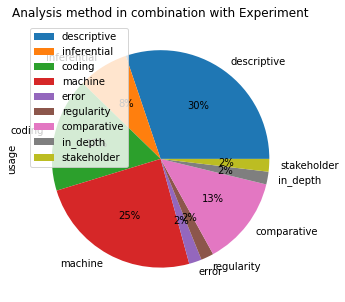

In [180]:
types = []
amount = []
study_data = data[~data['study'].isnull()]
for col in range(5, len(study_data.columns)):
        if study_data[study_data.columns[col]].value_counts().sum() != 0:
                types.append(study_data.columns[col])
                amount.append(study_data[study_data.columns[col]].value_counts().sum())
study_data = pd.DataFrame({'usage': amount}, index=types)
study_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(5,5), title="Analysis methods in combination with Studies")

<AxesSubplot:title={'center':'Analysis method in combination with Experiment'}, ylabel='usage'>

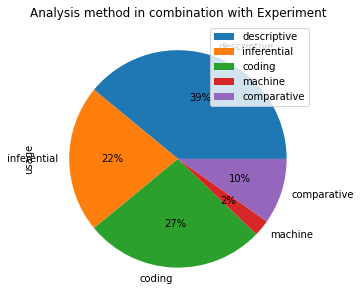

In [182]:
methods = []
amount = []
survey_data = data[~data['survey'].isnull()]
for col in range(5, len(survey_data.columns)):
        if survey_data[survey_data.columns[col]].value_counts().sum() != 0:
                methods.append(survey_data.columns[col])
                amount.append(survey_data[survey_data.columns[col]].value_counts().sum())
survey_data = pd.DataFrame({'usage': amount}, index=methods)
survey_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(5,5), title="Analysis method in combination with Surveys")

<AxesSubplot:title={'center':'Analysis method in combination with Secondary Research'}, ylabel='usage'>

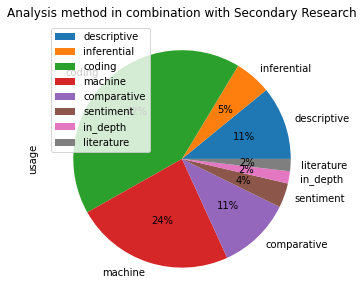

In [183]:
methods = []
amount = []
secondary_research_data = data[~data['secondary_research'].isnull()]
for col in range(5, len(secondary_research_data.columns)):
        if secondary_research_data[secondary_research_data.columns[col]].value_counts().sum() != 0:
                methods.append(secondary_research_data.columns[col])
                amount.append(secondary_research_data[secondary_research_data.columns[col]].value_counts().sum())
secondary_research_data = pd.DataFrame({'usage': amount}, index=methods)
secondary_research_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(5,5), title="Analysis method in combination with Secondary Research")

In [ ]:
methods = []
amount = []
secondary_research_data = data[~data['secondary_research'].isnull()]
for col in range(5, len(secondary_research_data.columns)):
        if secondary_research_data[secondary_research_data.columns[col]].value_counts().sum() != 0:
                methods.append(secondary_research_data.columns[col])
                amount.append(secondary_research_data[secondary_research_data.columns[col]].value_counts().sum())
secondary_research_data = pd.DataFrame({'usage': amount}, index=methods)
secondary_research_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(5,5), title="Analysis method in combination with Secondary Research")